Welcome to this notebook, here are some interesting facts that you should know:
1. This is pretty much a straight forward notebook which can be easily understood by everyone
2. Each and every plots will have some interesting intution which have been mentioned below it
3. Documentation link have been given at the end,incase if you want to learn more about it you can use it
4. This notebook is only to show different visualization techniques and how to interpret them, no predictive modelling has been performed
5. A total of 10 plots have been mentioned which i think more sufficient for analysing almost all the numerical and categorical data

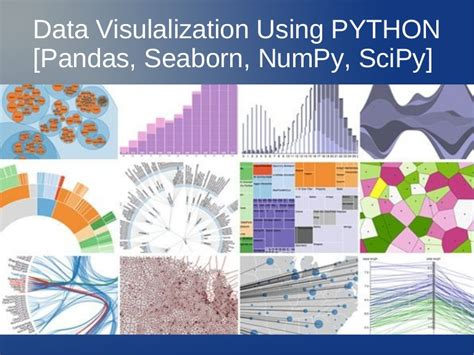

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
data = pd.read_csv('/kaggle/input/titanic/train.csv')

In [ ]:
data.head(5)

In [ ]:
data.info()

# Helper Functions

In [ ]:
def categorize(col):
    numerical,category=[],[]
    for i in col:
        if data[i].dtype ==object:
            category.append(i)
        else:
            numerical.append(i)
    print("The numerical features {}:".format(numerical))
    print("The categorical features {}:".format(category))
    return category,numerical

In [ ]:
def handle_missing_values(col):
    print('Enter your choice\n1.Mean\t2.Median\t3.Mode')
    i=int(input())
    if i ==1:
        val =data[col].mean()
    elif i ==2:
        val = data[col].median()
    else:
        val = data[col].mode()[0]
    data[col] = data[col].fillna(val)


In [ ]:
def get_correlated(cor):
    correlated =set()
    for i in cor.columns:
        for j in cor.columns:
            if cor[i][j]>0.7 or cor[i][j]>-0.7 and i!=j:
                correlated.add(i)
                correlated.add(j)
    print("The Correlated columns: {}".format(list(correlated)))
    return correlated

In [ ]:
cat, num = categorize(data)

In [ ]:
data[num].info()

# Handling Missing Values

In [ ]:
df = data[num].isnull().sum()

In [ ]:
for i in df.index:
    if df[i]>0:
        handle_missing_values(i)

In [ ]:
data[num].isnull().sum()

In [ ]:
df = data[cat].isnull().sum()

In [ ]:
df

In [ ]:
for i in df.index:
    if df[i]>0:
        handle_missing_values(i)

In [ ]:
data[cat].isnull().sum()

# <center>Histogram </center>

In [ ]:
sns.distplot(data['Age'],kde =False)

* Maximum no.of people are in the age of 27-30
* There are very less no.of people in the age above 80

# <center>Histogram with hue </center>

In [ ]:
g = sns.FacetGrid(data, row = 'Survived')
g = g.map(plt.hist,'Age')

* Most of the children got survived
* Survival of adults is very low
* Teenagers also mostly survived
* Survival rate of old people is low

In [ ]:
num

# <center>Boxplot</center>

In [ ]:
sns.boxplot(x='Fare',data=data)

* Mostly the fare is within 100
* Potential outliers are also there which are more than 100
* The data is right skewed

# <center>Boxplot with hue</center>

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.boxplot(x='Age',y='Sex',hue='Pclass',data=data)

* Most of the males and females are in pclass 1
* None of the old women(above 60) are in Pclass 2 and Pclass 1
* Most of the males and female adults prefer Pclass 2
* There are some old males who prefer Pclass 3
* Mostly childrens are in Pclass 1

# <center>Pair Plot</center>

In [ ]:
sns.pairplot(data[num])

Main thing about pairplot is it will show the distribution of each numerical columns and also correlation between different columns will also be mentioned(ek graph many mangoes!!!)

# <center>Heatmap</center>

In [ ]:
sns.heatmap(data.corr(),annot = True)

# **Highely correlated columns(both negative and positive correlation)**

In [ ]:
correleated = get_correlated(data[num].corr())

# <center> RegPlot</center>

In [ ]:
sns.regplot(x = 'Age', y= 'Fare',data =data)

* The correlation between Age and Fare is quite low
* Most of the fare is within the range 10 to 300 inspite of the age
* There are very few outliers to the above mentioned rule

# <center>Joint Plot</center>

In [ ]:
sns.jointplot(x = 'SibSp' , y = 'Age',data= data,kind='reg')

* Negative Correlaation
* Lesser the age more the SibSp
* More the age lesser the SibSp

# <center>CatPlot</center>

In [ ]:
sns.catplot(x='Sex',y='Age',data=data)

* There are very less old females
* More males are in the age between 18-40
* More females are in the age between 15-30
* Almost equal no.of male and female childrens

[](http://)

> # <center>CountPlot</center>

In [ ]:
sns.countplot(data['Survived'])

Ratio of Survived to Not Survived is 60:40

# <center>SwarmPlot</center>

In [ ]:
plt.figure(figsize = (10,10))
sns.swarmplot(y = 'Embarked',x='Age',data=data,hue='Sex')

* Most of the males are embarked from Southampton
* Females embarked from both Cherbourg and Southampton
* Embarked from Queenstown is occupied by men and women in the age group 25-28

# <center>ViolinPlot</center>

In [ ]:
plt.figure(figsize=(10,10))
sns.violinplot(y = 'Sex',x ='Age',hue ='Pclass',data =data )

* The distribution of females in the age 20 to 40 are mostly in pclass 3
* The distribution of female children are mostly in pclass 3
* The distribution of male children are mostly in pclass 1 and 2
* The distribution of old age males are mostly in pclass 1

# Documentation
https://seaborn.pydata.org/tutorial/distributions.html<br/>
https://seaborn.pydata.org/tutorial/categorical.html<br/>
https://seaborn.pydata.org/tutorial/regression.html

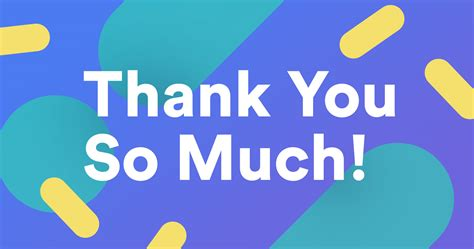

# <center>Hope you have learned some good stuffs...Upvote Karo</center>